In [110]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Keras
import keras
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras import layers
from keras.preprocessing import image

from functools import partial

from skimage.io import imread
from skimage.segmentation import mark_boundaries

import lime
from lime import lime_image

In [153]:
cwd= os.getcwd()
cwd

'C:\\Users\\Overlord\\Documents\\Courses\\DU_DataAnalytics_BootCamp_TDB\\Projects\\Team_Project\\mean_freqs'

In [3]:
DATADIR = os.path.join(cwd, "best-artworks-of-all-time","images")
CATEGORIES = ["paintings", "photographs"]
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category) 
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
#         plt.imshow(img_array, cmap="gray")
#         plt.show()
#         break
#     break

In [4]:
img_size = 120

In [6]:
model = keras.models.load_model("cnn1_binary.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [101]:
def preprocess_image(image_path):
    img_size = 120
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (img_size, img_size))
    new_array= np.array(new_array).reshape(-1, img_size, img_size, 3)
    return new_array

def preprocess_image_lime(image_path):
    img_size = 120
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
    print(img_array.shape)
    img_array = np.expand_dims(img_array, axis=0)
    print(img_array.shape)
    img_array= np.array(img_array).reshape(-1, *img_array.shape)
    print(img_array.shape)
    return img_array

In [71]:
def predict(image_path):
    img_arr= preprocess_image(image_path)
    prediction= model.predict_classes(img_arr)
    if prediction[0] == 0:
        return "Painting"
    else:
        return "Photograph"

In [60]:
image_path= os.path.join(cwd, "best-artworks-of-all-time","images","paintings")

predictions= []

for category in ["painting","photograph"]:
    for i in range(1,101):
        image_path= os.path.join(cwd, "best-artworks-of-all-time","images",f"{category}s",f"{category} ({i}).jpg")
        img_arr= preprocess_image(image_path)
        predictions.append(predict(image_path))

In [66]:
print(type(list(set(predictions))))

<class 'list'>


In [68]:
explainer= lime_image.LimeImageExplainer()

In [102]:
img_arr= preprocess_image_lime(image_path)
print(img_arr[0].shape)

(768, 486, 3)
(1, 768, 486, 3)
(1, 1, 768, 486, 3)
(1, 768, 486, 3)


In [113]:
%%time

image_path= os.path.join(cwd, "best-artworks-of-all-time","images","paintings", "painting (5).jpg")
img_arr= preprocess_image(image_path)

explanation = explainer.explain_instance(
    img_arr[0],
    model.predict,
    top_labels=5,
    hide_color=None,
    num_samples=1000
)

Wall time: 6.82 s


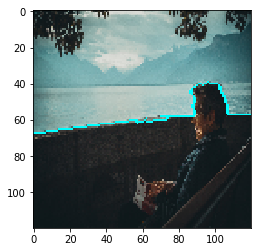

In [168]:
image_path= os.path.join(cwd, "best-artworks-of-all-time","images","photographs", "photograph (5).jpg")
img_size = 120
img= image.load_img(image_path, target_size= (img_size, img_size))

temp, mask= explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only= False,
    num_features= 6,
    hide_rest= False)

plt.imshow(
    mark_boundaries(
        img,
        mask,
        color= (0,1,1)
    )
)

In [127]:
%%time

image_path= os.path.join(cwd, "best-artworks-of-all-time","images","photographs", "photograph (5).jpg")
img_arr= preprocess_image(image_path)

explanation = explainer.explain_instance(
    img_arr[0],
    model.predict,
    top_labels=5,
    hide_color=None,
    num_samples=1000
)

Wall time: 7.09 s


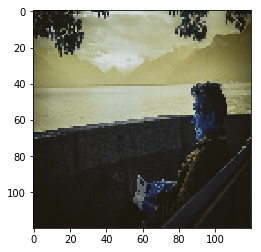

In [128]:
temp, mask= explanation.get_image_and_mask(explanation.top_labels[0], positive_only= True, num_features= 100, hide_rest= False)
plt.imshow(
    mark_boundaries(temp, mask),
    vmin= 0,
    vmax= 255
)